In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn

In [6]:
a = torch.tensor([1.])

In [7]:
a

tensor([1.])

In [8]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [9]:
x_data

tensor([[1, 2],
        [3, 4]])

In [10]:
from PIL import Image

In [11]:
image = Image.open("/Users/deepaksharma/Desktop/VGG.png")

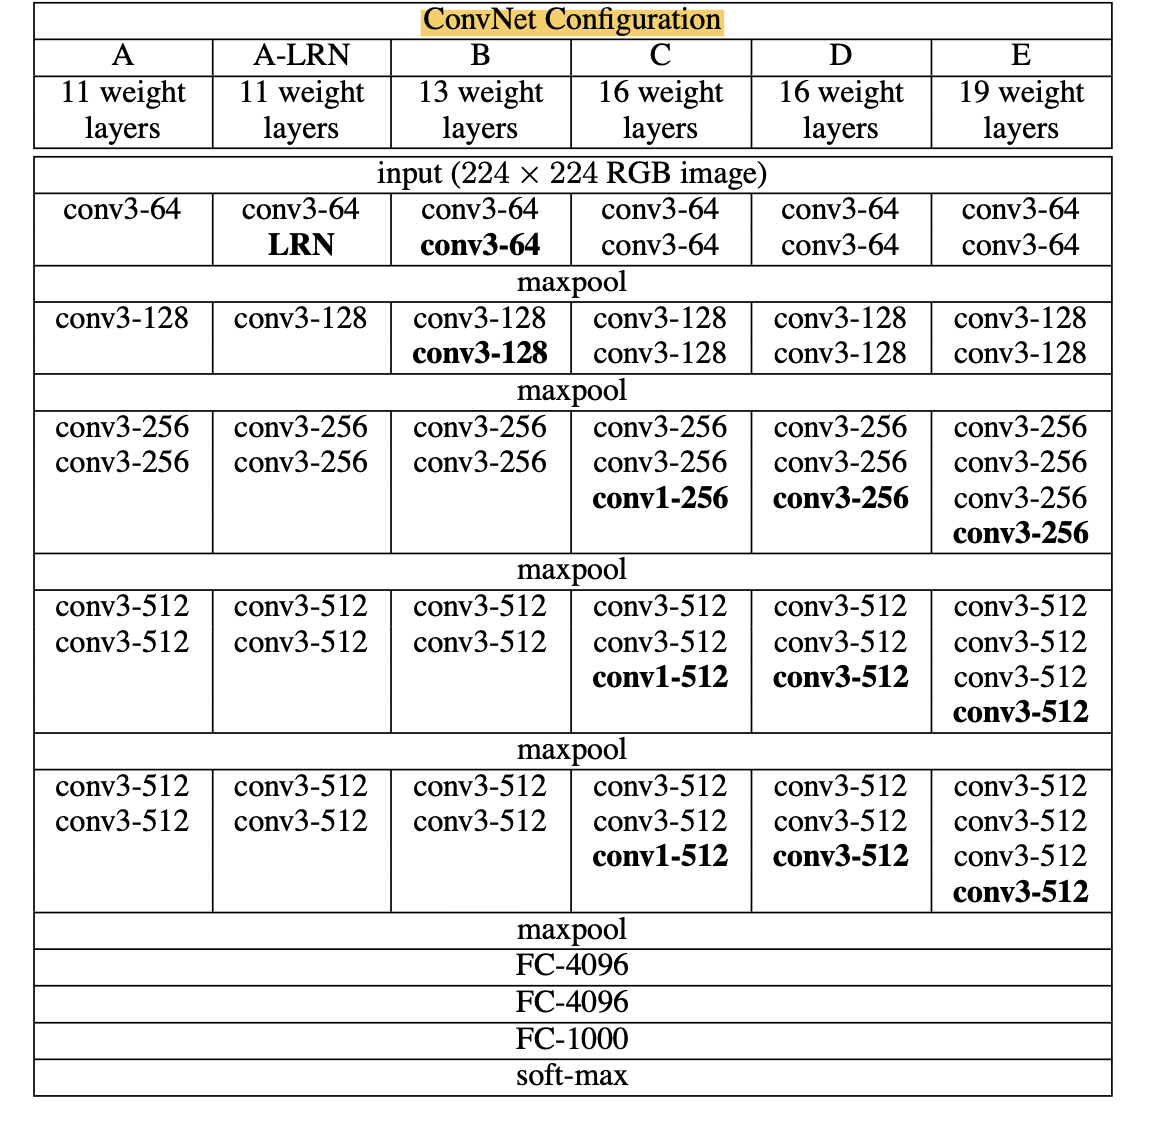

In [12]:
image

In [64]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size = 3, stride = 1, padding = 1):
        super(ConvBlock, self).__init__()
        self.conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.activation = nn.ReLU()
    def forward(self, x):
        return self.activation(self.conv_layer(x))

In [68]:
class B_VGG(nn.Module):
    def __init__(self, in_channels = 3, out_classes = 10, channels = [64, 128, 256, 512]):
        super(B_VGG, self).__init__()
        self.in_channels = in_channels
        self.conv_network = nn.Sequential(
            ConvBlock(in_channels, channels[0]),
            ConvBlock(channels[0], channels[0]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[0], channels[1]),
            ConvBlock(channels[1], channels[1]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[1], channels[2]),
            ConvBlock(channels[2], channels[2]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[2], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*7*7, 4096)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4096, 4096)
        self.outputs = nn.Sequential(
            nn.Linear(4096, out_classes),
            nn.Softmax(),
        )
    def forward(self, x):
        x = self.conv_network(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.outputs(x)
        return x

In [69]:
def train():
    x = torch.rand((3,3,224,224))
    model = B_VGG()
    y = model(x)
    print(y)
    print(y.shape)

In [70]:
train()

tensor([[0.1008, 0.1010, 0.0995, 0.1004, 0.1010, 0.0996, 0.0990, 0.1011, 0.0987,
         0.0989],
        [0.1002, 0.1012, 0.0994, 0.0994, 0.1009, 0.0994, 0.0995, 0.1004, 0.0997,
         0.0999],
        [0.0998, 0.1008, 0.0998, 0.0993, 0.1009, 0.0999, 0.0993, 0.1007, 0.0998,
         0.0998]], grad_fn=<SoftmaxBackward0>)
torch.Size([3, 10])


In [71]:
class C_VGG(nn.Module):
    def __init__(self, in_channels = 3, out_classes = 10, channels = [64, 128, 256, 512]):
        super(C_VGG, self).__init__()
        self.in_channels = in_channels
        self.conv_network = nn.Sequential(
            ConvBlock(in_channels, channels[0]),
            ConvBlock(channels[0], channels[0]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[0], channels[1]),
            ConvBlock(channels[1], channels[1]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[1], channels[2]),
            ConvBlock(channels[2], channels[2]),
            ConvBlock(channels[2], channels[2], kernel_size = 1, padding = 0, stride = 1),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[2], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3], kernel_size = 1, padding = 0, stride = 1),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3], kernel_size = 1, padding = 0, stride = 1),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*7*7, 4096)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4096, 4096)
        self.outputs = nn.Sequential(
            nn.Linear(4096, out_classes),
            nn.Softmax(),
        )
    def forward(self, x):
        x = self.conv_network(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.outputs(x)
        return x

In [72]:
def train():
    x = torch.rand((3,3,224,224))
    model = C_VGG()
    y = model(x)
    print(y)
    print(y.shape)

In [73]:
train()

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[0.0998, 0.0988, 0.0993, 0.1002, 0.0999, 0.0994, 0.0996, 0.1017, 0.1014,
         0.0999],
        [0.0994, 0.0986, 0.0996, 0.1003, 0.0993, 0.1005, 0.0996, 0.1012, 0.1011,
         0.1003],
        [0.0998, 0.0987, 0.0989, 0.1014, 0.0994, 0.1004, 0.0997, 0.1011, 0.1008,
         0.0997]], grad_fn=<SoftmaxBackward0>)
torch.Size([3, 10])


In [76]:
class D_VGG(nn.Module):
    def __init__(self, in_channels = 3, out_classes = 10, channels = [64, 128, 256, 512]):
        super(D_VGG, self).__init__()
        self.in_channels = in_channels
        self.conv_network = nn.Sequential(
            ConvBlock(in_channels, channels[0]),
            ConvBlock(channels[0], channels[0]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[0], channels[1]),
            ConvBlock(channels[1], channels[1]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[1], channels[2]),
            ConvBlock(channels[2], channels[2]),
            ConvBlock(channels[2], channels[2]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[2], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*7*7, 4096)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4096, 4096)
        self.outputs = nn.Sequential(
            nn.Linear(4096, out_classes),
            nn.Softmax(),
        )
    def forward(self, x):
        x = self.conv_network(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.outputs(x)
        return x

In [77]:
def train():
    x = torch.rand((3,3,224,224))
    model = D_VGG()
    y = model(x)
    print(y)
    print(y.shape)

In [78]:
train()

tensor([[0.0996, 0.1001, 0.0991, 0.1010, 0.1005, 0.1000, 0.1007, 0.1001, 0.0989,
         0.0999],
        [0.1005, 0.1001, 0.0988, 0.1004, 0.1005, 0.1002, 0.1000, 0.1002, 0.0994,
         0.0999],
        [0.1005, 0.0996, 0.0993, 0.1011, 0.1005, 0.0994, 0.1001, 0.1005, 0.0994,
         0.0997]], grad_fn=<SoftmaxBackward0>)
torch.Size([3, 10])


In [79]:
class E_VGG(nn.Module):
    def __init__(self, in_channels = 3, out_classes = 10, channels = [64, 128, 256, 512]):
        super(E_VGG, self).__init__()
        self.in_channels = in_channels
        self.conv_network = nn.Sequential(
            ConvBlock(in_channels, channels[0]),
            ConvBlock(channels[0], channels[0]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[0], channels[1]),
            ConvBlock(channels[1], channels[1]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[1], channels[2]),
            ConvBlock(channels[2], channels[2]),
            ConvBlock(channels[2], channels[2]),
            ConvBlock(channels[2], channels[2]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[2], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*7*7, 4096)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4096, 4096)
        self.outputs = nn.Sequential(
            nn.Linear(4096, out_classes),
            nn.Softmax(),
        )
    def forward(self, x):
        x = self.conv_network(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.outputs(x)
        return x

In [80]:
def train():
    x = torch.rand((3,3,224,224))
    model = E_VGG()
    y = model(x)
    print(y)
    print(y.shape)

In [81]:
train()

tensor([[0.1008, 0.1001, 0.1001, 0.1001, 0.1000, 0.0989, 0.1006, 0.0997, 0.1010,
         0.0986],
        [0.1013, 0.0995, 0.1001, 0.1007, 0.1005, 0.0987, 0.1007, 0.0995, 0.1012,
         0.0977],
        [0.0996, 0.1001, 0.1010, 0.0997, 0.1005, 0.0997, 0.1007, 0.0996, 0.1010,
         0.0981]], grad_fn=<SoftmaxBackward0>)
torch.Size([3, 10])


In [82]:
class A_VGG(nn.Module):
    def __init__(self, in_channels = 3, out_classes = 10, channels = [64, 128, 256, 512]):
        super(A_VGG, self).__init__()
        self.in_channels = in_channels
        self.conv_network = nn.Sequential(
            ConvBlock(in_channels, channels[0]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[0], channels[1]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[1], channels[2]),
            ConvBlock(channels[2], channels[2]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[2], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*7*7, 4096)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4096, 4096)
        self.outputs = nn.Sequential(
            nn.Linear(4096, out_classes),
            nn.Softmax(),
        )
    def forward(self, x):
        x = self.conv_network(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.outputs(x)
        return x

In [83]:
def train():
    x = torch.rand((3,3,224,224))
    model = A_VGG()
    y = model(x)
    print(y)
    print(y.shape)

In [84]:
train()

tensor([[0.0987, 0.0992, 0.1018, 0.1001, 0.0990, 0.1024, 0.0990, 0.1014, 0.0992,
         0.0992],
        [0.0998, 0.0987, 0.1016, 0.1010, 0.0995, 0.1014, 0.0994, 0.1009, 0.0991,
         0.0985],
        [0.0983, 0.0982, 0.1022, 0.1005, 0.0992, 0.1018, 0.0997, 0.1012, 0.0994,
         0.0995]], grad_fn=<SoftmaxBackward0>)
torch.Size([3, 10])


In [85]:
class A_LRN_VGG(nn.Module):
    def __init__(self, in_channels = 3, out_classes = 10, channels = [64, 128, 256, 512]):
        super(A_LRN_VGG, self).__init__()
        self.in_channels = in_channels
        self.conv_network = nn.Sequential(
            ConvBlock(in_channels, channels[0]),
            nn.BatchNorm2d(channels[0]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[0], channels[1]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[1], channels[2]),
            ConvBlock(channels[2], channels[2]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[2], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            ConvBlock(channels[3], channels[3]),
            ConvBlock(channels[3], channels[3]),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*7*7, 4096)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4096, 4096)
        self.outputs = nn.Sequential(
            nn.Linear(4096, out_classes),
            nn.Softmax(),
        )
    def forward(self, x):
        x = self.conv_network(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.outputs(x)
        return x

In [86]:
def train():
    x = torch.rand((3,3,224,224))
    model = A_LRN_VGG()
    y = model(x)
    print(y)
    print(y.shape)

In [87]:
train()

tensor([[0.1010, 0.0973, 0.0993, 0.1004, 0.1000, 0.0999, 0.0999, 0.1018, 0.0999,
         0.1004],
        [0.1011, 0.0975, 0.0996, 0.0996, 0.0996, 0.0997, 0.1003, 0.1010, 0.1004,
         0.1010],
        [0.1005, 0.0978, 0.0997, 0.0994, 0.0993, 0.1000, 0.0996, 0.1018, 0.1010,
         0.1010]], grad_fn=<SoftmaxBackward0>)
torch.Size([3, 10])
